**Nama : Dhila Pritha Amalia //** **NIM :24060122140117 //** **Lab :C1**

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

**Memuat Data Set**

In [ ]:
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

**2. Evaluasi hasil clustering menggunakan inertia (SSE) dan silhouette coefficient**

In [ ]:
# Menggunakan hanya fitur untuk clustering (tanpa kolom class)
X = dataset.iloc[:, :-1].values

# Melakukan clustering dengan KMeans
n_clusters = 3  # Sesuaikan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # Now KMeans is defined
kmeans.fit(X)

# Evaluasi inertia (SSE)
inertia = kmeans.inertia_  # Sum of Squared Errors (SSE)

# Evaluasi silhouette coefficient
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)

# Menampilkan hasil evaluasi
print("Inertia (SSE):", inertia)
print("Silhouette Coefficient:", silhouette_avg)

Inertia (SSE): 78.94506582597728
Silhouette Coefficient: 0.5509643746707443


Penjelasan : Evaluasi clustering dilakukan dengan menggunakan **KMeans** pada dataset tanpa kolom target (`class`), dengan jumlah cluster yang ditentukan sebanyak 3. Hasil evaluasi menggunakan **Inertia (SSE)** menunjukkan total jarak kuadrat antara data dan centroid cluster, di mana nilai inertia yang lebih kecil menunjukkan bahwa data lebih terpusat di sekitar centroid. Selain itu, evaluasi **Silhouette Coefficient** memberikan skor rata-rata untuk mengukur seberapa baik data dikelompokkan, dengan nilai yang lebih mendekati 1 menunjukkan clustering yang baik dan terpisah. Kedua metrik ini saling melengkapi untuk menilai kualitas hasil clustering secara kuantitatif.

**3. Menentukan jumlah K dengan Elbow Method saja**

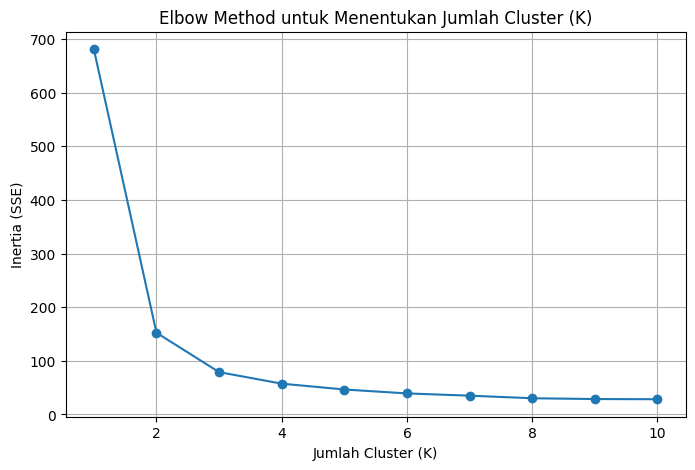

In [ ]:
# Elbow Method
sse = []  # List untuk menyimpan inertia (SSE)
k_range = range(1, 11)  # Range jumlah cluster (K)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster (K)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()


Penjelasan :
Kode tersebut menggunakan Elbow Method untuk menentukan jumlah cluster optimal dengan menghitung nilai inertia (SSE) untuk setiap jumlah cluster dari 1 hingga 10. Inertia menunjukkan total jarak kuadrat antara data dan centroid cluster. Nilai SSE dihitung dalam iterasi untuk setiap jumlah cluster menggunakan algoritma KMeans dan disimpan dalam daftar sse. Grafik Elbow kemudian dibuat dengan memplot jumlah cluster (K) terhadap nilai SSE, di mana titik "siku" pada grafik menunjukkan jumlah cluster optimal. Grafik ini membantu menentukan jumlah cluster yang memberikan hasil terbaik tanpa overfitting.

**4. Memplot hasil clustering dengan nilai K yang telah dipilih menggunakan scatterplot.**


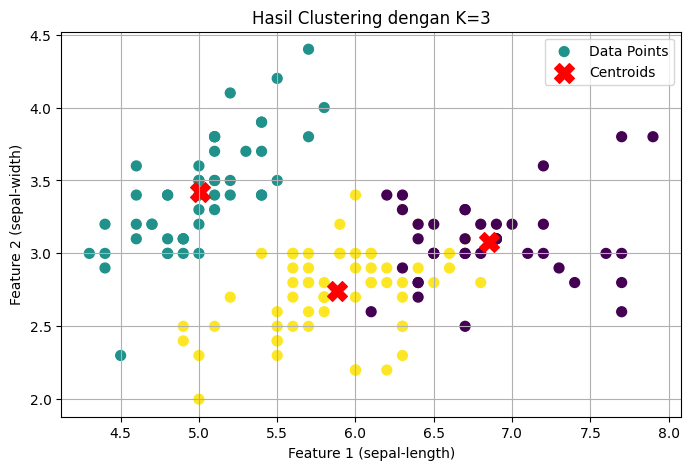

In [ ]:
# Pilih jumlah cluster (K) yang optimal, misalnya K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Plot hasil clustering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title(f'Hasil Clustering dengan K={optimal_k}')
plt.xlabel('Feature 1 (sepal-length)')
plt.ylabel('Feature 2 (sepal-width)')
plt.legend()
plt.grid(True)
plt.show()


Memvisualisasikan hasil clustering menggunakan scatterplot setelah menentukan jumlah cluster optimal K (contoh: K=3). Model KMeans dilatih pada data dengan jumlah cluster sesuai nilai K yang dipilih. Setiap data diberi label cluster (labels), yang digunakan untuk mewarnai titik-titik pada scatterplot. Titik-titik data digambarkan dalam dua dimensi, misalnya fitur sepal-length dan sepal-width, dengan warna yang menunjukkan cluster masing-masing. Centroid cluster digambarkan menggunakan simbol 'X' merah besar. Scatterplot ini memberikan gambaran visual tentang pembagian cluster dan lokasi centroid masing-masing.